In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_features(poi_data,mob_data,landuse_data,mask_poi,mask_mob,mask_landuse):
    """
    用于可视化多类型空间特征数据及其掩码（mask）处理结果，通过左右两个 3D 散点图对比展示：
    原始特征数据的空间分布（左图）；经掩码处理后的数据分布（右图，被掩盖的特征显示为灰色）。

    参数：
    poi_data：二维数组（数值），表示不同区域的 POI（兴趣点）特征数据
    mob_data：二维数组（数值），表示不同区域的人类移动性特征数据
    landuse_data：二维数组（数值），表示不同区域的土地利用特征数据
    mask_poi：二维数组（0/1），与 poi_data 同形状，0 表示该位置特征被掩盖，1 表示保留。
    mask_mob：二维数组（0/1），与 mob_data 同形状，规则同上。
    mask_landuse：二维数组（0/1），与 landuse_data 同形状，规则同上。

    配色：
    POI（兴趣点）特征数据：plt.cm.Blues
    人类移动性特征数据：plt.cm.Greens
    土地利用特征数据：plt.cm.Reds
    掩码部分：gray
    """
    # 设置全局字体大小
    plt.rcParams.update({'font.size': 22})
    plt.rc('axes', labelsize=26, titlesize=26)
    plt.rc('xtick', labelsize=26)
    plt.rc('ytick', labelsize=26)
    
    # 创建图形，两个子图并排
    fig = plt.figure(figsize=(20, 15))
    
   
    
    # 数据归一化到 [0, 1]
    scaler = MinMaxScaler()
    mob_norm = scaler.fit_transform(mob_data)
    poi_norm = scaler.fit_transform(poi_data)
    landuse_norm = scaler.fit_transform(landuse_data)
    
    # 创建网格
    x_poi, y_poi = np.meshgrid(np.arange(mob_data.shape[0]), np.arange(poi_data.shape[1]))
    x_mob, y_mob = np.meshgrid(np.arange(mob_data.shape[0]), np.arange(mob_data.shape[1]))
    x_landuse, y_landuse = np.meshgrid(np.arange(mob_data.shape[0]), np.arange(landuse_data.shape[1]))
    
    # 定义颜色处理函数
    def get_colors(norm_data, mask, cmap_name, masked_color='gray'):
        cmap = plt.cm.get_cmap(cmap_name)
        colors = cmap(norm_data)  # 获取正常的颜色映射
        colors[mask == 0] = plt.cm.colors.to_rgba(masked_color)  # 将掩码的值改为灰色
        return colors
    
    # 第一个子图 - 原始数据
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x_poi.flatten(), y_poi.flatten(), poi_norm.flatten() + 1,
                c=plt.cm.Blues(poi_norm.flatten()), s=100, alpha=0.7, label="POI")
    ax1.scatter(x_mob.flatten(), y_mob.flatten(), mob_norm.flatten() + 2,
                c=plt.cm.Greens(mob_norm.flatten()), s=100, alpha=0.7, label="Mobility")
    ax1.scatter(x_landuse.flatten(), y_landuse.flatten(), landuse_norm.flatten(),
                c=plt.cm.Reds(landuse_norm.flatten()), s=100, alpha=0.7, label="Land Use")
    # ax1.set_title("Original Features", fontweight='bold', pad=20)
    ax1.set_xlabel('Region Index', fontweight='bold', labelpad=20)
    ax1.set_ylabel('Feature Index', fontweight='bold', labelpad=20)
    ax1.set_zlabel('Feature Value', fontweight='bold', labelpad=20)
    
    # 第二个子图 - 包含掩码的数据
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x_poi.flatten(), y_poi.flatten(), poi_norm.flatten() + 1,
                c=get_colors(poi_norm.flatten(), mask_poi.flatten(), 'Blues'), s=100, alpha=0.7, label="POI")
    ax2.scatter(x_mob.flatten(), y_mob.flatten(), mob_norm.flatten() + 2,
                c=get_colors(mob_norm.flatten(), mask_mob.flatten(), 'Greens'), s=100, alpha=0.7, label="Mobility")
    ax2.scatter(x_landuse.flatten(), y_landuse.flatten(), landuse_norm.flatten(),
                c=get_colors(landuse_norm.flatten(), mask_landuse.flatten(), 'Reds'), s=100, alpha=0.7, label="Land Use")
    # ax2.set_title("Features with Masking", fontweight='bold', pad=20)
    ax2.set_xlabel('Region Index', fontweight='bold', labelpad=20)
    ax2.set_ylabel('Feature Index', fontweight='bold', labelpad=20)
    ax2.set_zlabel('Feature Value', fontweight='bold', labelpad=20)
    # 设置视角
    ax1.view_init(elev=20, azim=240)
    ax2.view_init(elev=20, azim=240)
    
    custom_scatter1 = plt.scatter([], [], c='blue', label='POI', s=200)
    custom_scatter2 = plt.scatter([], [], c='red', label='land usage', s=200)
    custom_scatter3 = plt.scatter([], [], c='green', label='human mobility', s=200)
    custom_scatter4 = plt.scatter([], [], c='gray', label='mask', s=200)  # Adding mask with gray color
    
    fig.legend(handles=[custom_scatter1, custom_scatter2, custom_scatter3, custom_scatter4],
               loc='lower center', bbox_to_anchor=(0.5, 0.7),
               ncol=4, fontsize=30, frameon=False, columnspacing=4,
               edgecolor='black', facecolor='white')
    
    
    
    
    fig.text(0.25, 0.1, 'Original Features', ha='center', fontsize=26, fontweight='bold')  # 左图小标题
    fig.text(0.75, 0.1, 'Features with RAM', ha='center', fontsize=26, fontweight='bold')  # 右图小标题
    
    # 调整布局
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    # 保存和显示图片
    plt.savefig('features_with_mask_and_original_fixed.pdf', dpi=300, bbox_inches='tight')
    plt.show()


C:\Users\86198\AppData\Local\Temp\ipykernel_9968\2754917781.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


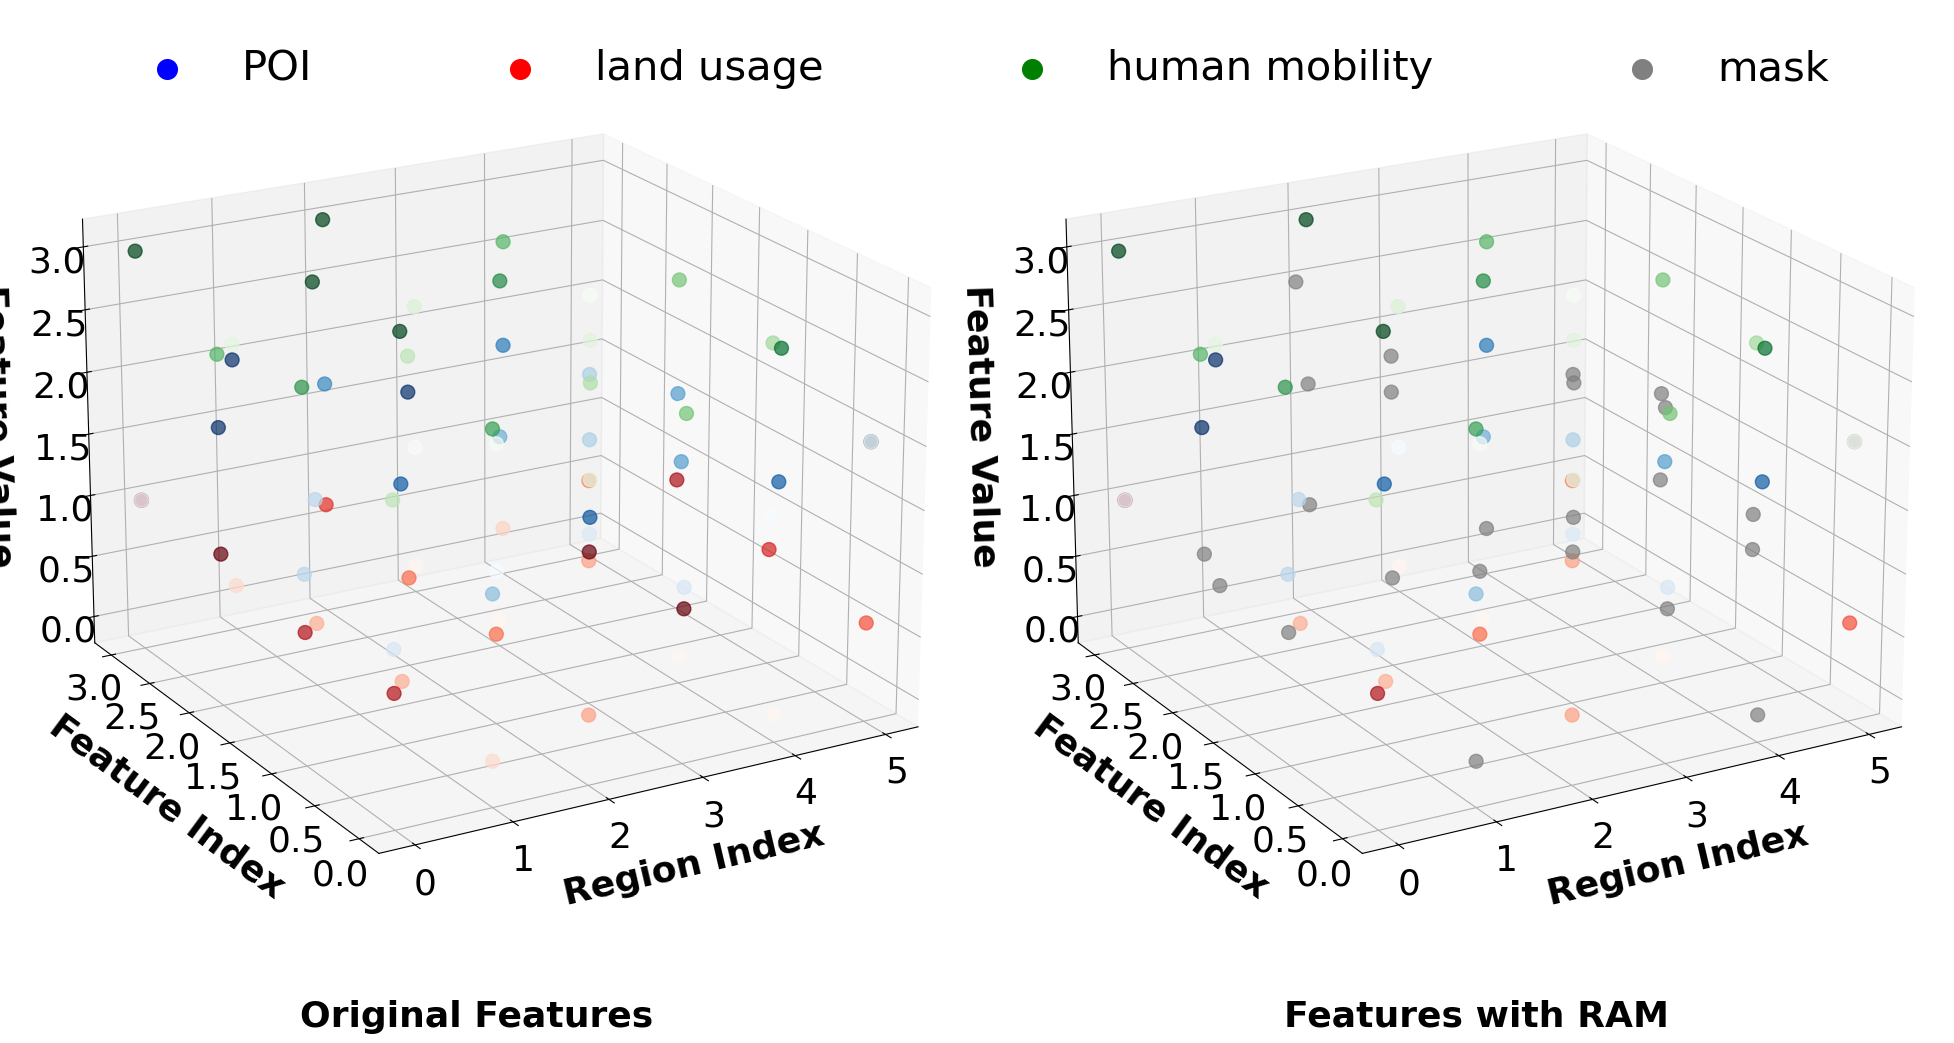

In [5]:
# 加载数据
# mob_data = np.load('mob.npy')
# poi_data = np.load('poi.npy')
# landuse_data = np.load('landuse.npy')
# mask_mob = np.load('mask_3.npy')
# mask_poi = np.load('mask_1.npy')
# mask_landuse = np.load('mask_2.npy')

# 示例
# 1. POI数据
poi_data = np.array([
    [0.2, 0.5, 0.8, 0.3],
    [0.6, 0.9, 0.4, 0.7],
    [0.1, 0.3, 0.6, 0.2],
    [0.7, 0.4, 0.9, 0.5],
    [0.3, 0.6, 0.2, 0.8],
    [0.5, 0.2, 0.7, 0.4]
])

# 2. 人类移动性数据
mob_data = np.array([
    [0.4, 0.7, 0.2, 0.5],
    [0.8, 0.3, 0.6, 0.9],
    [0.2, 0.5, 0.1, 0.4],
    [0.6, 0.9, 0.3, 0.7],
    [0.3, 0.6, 0.8, 0.2],
    [0.9, 0.4, 0.5, 0.1]
])

# 3. 土地利用数据
landuse_data = np.array([
    [0.7, 0.3, 0.5, 0.9],
    [0.2, 0.6, 0.8, 0.4],
    [0.5, 0.9, 0.3, 0.7],
    [0.8, 0.4, 0.6, 0.2],
    [0.4, 0.8, 0.9, 0.3],
    [0.6, 0.2, 0.4, 0.5]
])

# 掩码矩阵（1表示保留，0表示掩盖）
mask_poi = np.array([  # POI数据掩码
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 0]
])

mask_mob = np.array([  # 移动性数据掩码
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1]
])

mask_landuse = np.array([  # 土地利用数据掩码
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
])
plot_features(poi_data,mob_data,landuse_data,mask_poi,mask_mob,mask_landuse)

